In [3]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import functions as fns
from scipy import stats
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Getting the API key

In [4]:
with open('C:/Users/ducha/.api_keys/census_api.txt') as f:
    api_key = json.load(f)['api_key']

## Data Retrieval, Cleaning, and Visualization

In [5]:
url_head = 'https://api.census.gov/data/2018/acs/acs1/profile?get=NAME'

ed_vars = [f'DP02_00{i}PE' for i in range(58,68)]
ed_col_names = ['state', 'total_pop', 'less_than_9_grade','HS_no_diploma','HS_grad','college_no_degree','assoc_degree','bachelor_degree',
             'grad_prof_degree','HS_or_more','bachelor_or_more']


ed_response = fns.api_call(url_head=url_head, variables=ed_vars, api_key=api_key)
ed_response.status_code

https://api.census.gov/data/2018/acs/acs1/profile?get=NAME,DP02_0058PE,DP02_0059PE,DP02_0060PE,DP02_0061PE,DP02_0062PE,DP02_0063PE,DP02_0064PE,DP02_0065PE,DP02_0066PE,DP02_0067PE&for=state:*&key=7feb4b9b31d10f7cf686de5ea2efd71b4fd6c1e2


200

In [6]:
df_ed = fns.json_to_pandas(ed_response, ed_col_names)
df_ed_south, df_ed_north = fns.region_dfs(df_ed)

In [7]:
df_ed_north.mean() - df_ed_south.mean()

total_pop           -968069.94
less_than_9_grade        -0.82
HS_no_diploma            -2.20
HS_grad                  -3.03
college_no_degree         0.53
assoc_degree              1.24
bachelor_degree           2.94
grad_prof_degree          1.32
HS_or_more                3.03
bachelor_or_more          4.28
dtype: float64

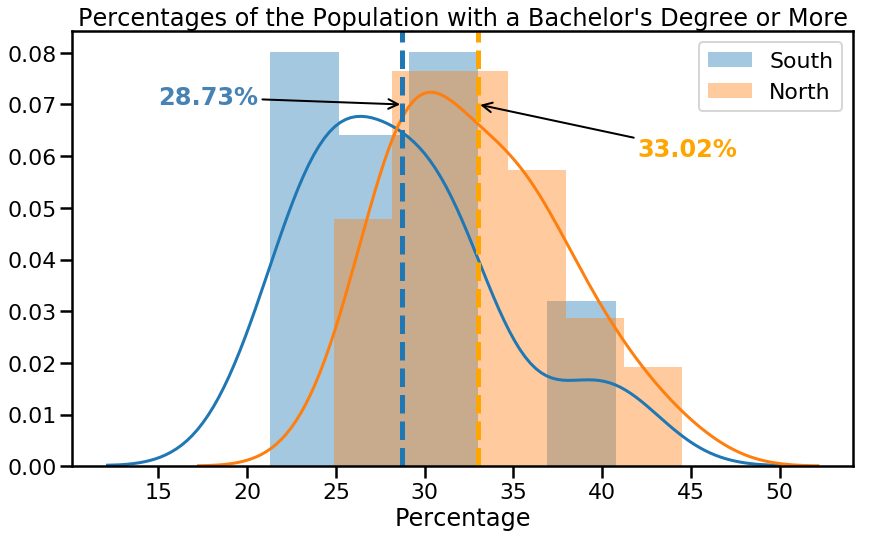

In [8]:
fns.census_plotter(df_ed_south, df_ed_north, 'bachelor_or_more',
               "Percentages of the Population with a Bachelor's Degree or More",
               "bachelor_degree.jpg")
plt.annotate(f"{round(df_ed_south['bachelor_or_more'].mean(), 2)}%",
             xy=(df_ed_south['bachelor_or_more'].mean(), 0.07),
             xytext=(15,0.07),
             color = 'steelblue',
             weight = 'bold',
             arrowprops={"arrowstyle": "->"})
plt.annotate(f"{round(df_ed_north['bachelor_or_more'].mean(), 2)}%",
             xy=(df_ed_north['bachelor_or_more'].mean(), 0.07),
             xytext=(42,0.06),
             color = 'orange',
             weight = 'bold',
             arrowprops={"arrowstyle": "->"})
plt.savefig('bachelor_degree.jpg')

In [9]:
url_head = 'https://api.census.gov/data/2018/acs/acs1/profile?get=NAME'

rent_vars = [f'DP04_0{i}PE' for i in range(136,144)]
rent_col_names = ['state', 'total_pop', '0-15p', '15-20p','20-25p','25-30p',
                '30-35p','35-100p','not_computed']

rent_response = fns.api_call(url_head=url_head, variables=rent_vars, api_key=api_key)
rent_response.status_code

https://api.census.gov/data/2018/acs/acs1/profile?get=NAME,DP04_0136PE,DP04_0137PE,DP04_0138PE,DP04_0139PE,DP04_0140PE,DP04_0141PE,DP04_0142PE,DP04_0143PE&for=state:*&key=7feb4b9b31d10f7cf686de5ea2efd71b4fd6c1e2


200

In [10]:
df_rent = fns.json_to_pandas(rent_response, rent_col_names)
df_rent_south, df_rent_north = fns.region_dfs(df_rent)
df_rent_south

,total_pop,0-15p,15-20p,20-25p,25-30p,30-35p,35-100p,not_computed
state,,,,,,,,
West Virginia,163337.00,15.80,11.60,11.20,12.00,8.20,41.10,-888888888.00
Georgia,1264338.00,13.40,13.30,13.00,10.60,9.20,40.50,-888888888.00
Maryland,695224.00,11.10,13.10,13.90,12.10,9.20,40.60,-888888888.00
Florida,2488732.00,8.60,10.80,12.10,11.90,9.70,46.80,-888888888.00
South Carolina,524808.00,13.30,13.50,12.60,11.80,8.90,39.80,-888888888.00
North Carolina,1281264.00,14.60,13.10,13.10,11.40,9.30,38.50,-888888888.00
Alabama,509079.00,15.80,13.10,11.30,11.90,9.10,38.80,-888888888.00
Kentucky,499653.00,16.80,14.00,13.30,11.60,8.80,35.60,-888888888.00
Louisiana,520450.00,13.80,10.10,10.50,9.80,9.60,46.20,-888888888.00


In [11]:
df_rent_north.mean() - df_rent_south.mean()

total_pop      -93303.47
0-15p               0.34
15-20p              0.69
20-25p              0.92
25-30p              0.41
30-35p             -0.29
35-100p            -2.05
not_computed        0.00
dtype: float64

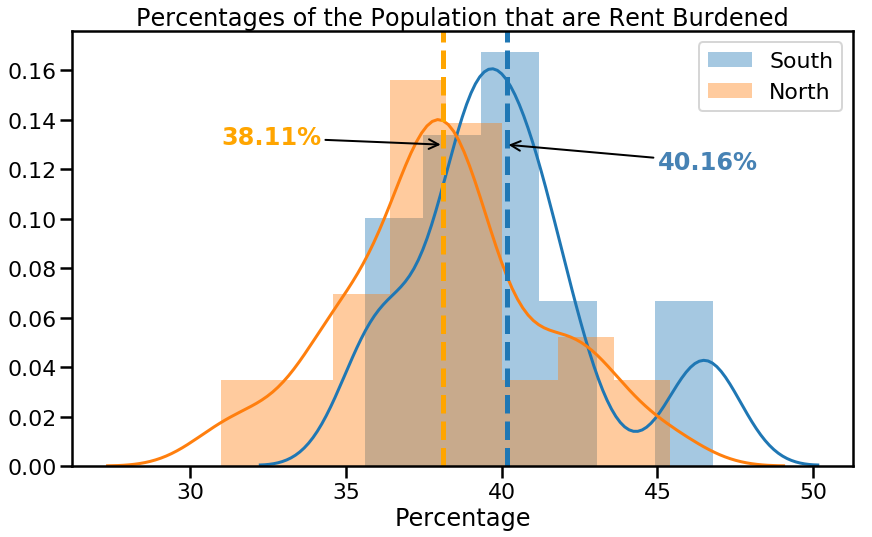

In [12]:
fns.census_plotter(df_rent_south, df_rent_north, '35-100p',
               "Percentages of the Population that are Rent Burdened",
               "rent_burden.jpg")
plt.annotate(f"{round(df_rent_north['35-100p'].mean(), 2)}%",
             xy=(df_rent_north['35-100p'].mean(), 0.13),
             xytext=(31,0.13),
             color = 'orange',
             weight = 'bold',
             arrowprops={"arrowstyle": "->"})
plt.annotate(f"{round(df_rent_south['35-100p'].mean(), 2)}%",
             xy=(df_rent_south['35-100p'].mean(), 0.13),
             xytext=(45,0.12),
             color = 'steelblue',
             weight = 'bold',
             arrowprops={"arrowstyle": "->"})
plt.savefig('rent_burden.jpg')

In [13]:
emp_vars = [f'DP03_000{i}PE' for i in range(1,10)]
emp_col_names = ['state', 'total_pop_16','in_labor_force','inlabor_civi_force','inlabor_civi_emp','inlabor_civi_unemp',
                 'inlabor_arm','not_inlabor','civilian_force','civilian_unemp']
emp_response = fns.api_call(url_head=url_head, variables=emp_vars, api_key=api_key)

df_emp = fns.json_to_pandas(emp_response,emp_col_names)
df_emp_south, df_emp_north = fns.region_dfs(df_emp)

https://api.census.gov/data/2018/acs/acs1/profile?get=NAME,DP03_0001PE,DP03_0002PE,DP03_0003PE,DP03_0004PE,DP03_0005PE,DP03_0006PE,DP03_0007PE,DP03_0008PE,DP03_0009PE&for=state:*&key=7feb4b9b31d10f7cf686de5ea2efd71b4fd6c1e2


In [14]:
df_emp_north.mean() - df_emp_south.mean()

total_pop_16         -1150185.00
in_labor_force              4.25
inlabor_civi_force          4.47
inlabor_civi_emp            4.83
inlabor_civi_unemp         -0.36
inlabor_arm                -0.23
not_inlabor                -4.25
civilian_force        -564157.16
civilian_unemp             -0.92
dtype: float64

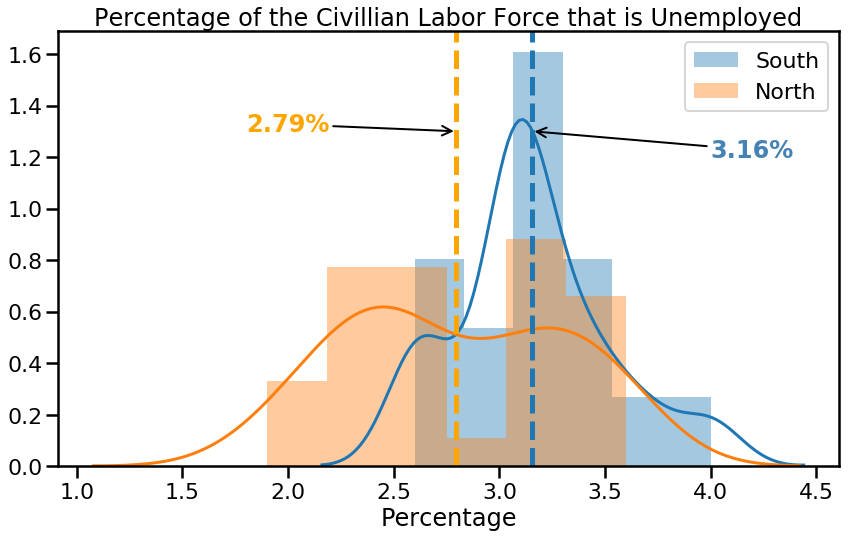

In [15]:
fns.census_plotter(df_emp_south, df_emp_north, 'inlabor_civi_unemp',
               'Percentage of the Civillian Labor Force that is Unemployed',
               'unemployed.jpg')
plt.annotate(f"{round(df_emp_north['inlabor_civi_unemp'].mean(), 2)}%",
             xy=(df_emp_north['inlabor_civi_unemp'].mean(), 1.3),
             xytext=(1.8,1.3),
             color = 'orange',
             weight = 'bold',
             arrowprops={"arrowstyle": "->"})
plt.annotate(f"{round(df_emp_south['inlabor_civi_unemp'].mean(), 2)}%",
             xy=(df_emp_south['inlabor_civi_unemp'].mean(), 1.3),
             xytext=(4.0,1.2),
             color = 'steelblue',
             weight = 'bold',
             arrowprops={"arrowstyle": "->"})
plt.savefig('unemployed.jpg')

In [16]:
url_head = 'https://api.census.gov/data/2018/acs/acs1?get=NAME'


emp_ed_vars = [f'B23006_00{i}E' for i in range(5,8)]
for j in range(12,28,7):
    emp_ed_vars = emp_ed_vars + [f'B23006_0{i+j}E' for i in range(0,3)]
    
emp_ed_col_names=['state', 'lt_HS_tot','lt_HS_emp','lt_HS_unemp','HS_tot','HS_emp',
                'HS_unemp','some_coll_tot','some_coll_emp','some_coll_unemp',
                'bachelor_tot', 'bachelor_emp', 'bachelor_unemp']

emp_ed_response = fns.api_call(url_head=url_head, variables=emp_ed_vars, api_key=api_key)

df_emp_ed = fns.json_to_pandas(emp_ed_response,emp_ed_col_names)
df_emp_ed_south, df_emp_ed_north = fns.region_dfs(df_emp_ed)

https://api.census.gov/data/2018/acs/acs1?get=NAME,B23006_005E,B23006_006E,B23006_007E,B23006_012E,B23006_013E,B23006_014E,B23006_019E,B23006_020E,B23006_021E,B23006_026E,B23006_027E,B23006_028E&for=state:*&key=7feb4b9b31d10f7cf686de5ea2efd71b4fd6c1e2


In [17]:
df_emp_ed_south.head()

,lt_HS_tot,lt_HS_emp,lt_HS_unemp,HS_tot,HS_emp,HS_unemp,some_coll_tot,some_coll_emp,some_coll_unemp,bachelor_tot,bachelor_emp,bachelor_unemp
state,,,,,,,,,,,,
Kentucky,114743.00,102224.00,12519.00,476578.00,449508.00,27070.00,546364.00,524012.00,22352.00,521880.00,512402.00,9478.00
Louisiana,160360.00,140391.00,19969.00,554592.00,517823.00,36769.00,514961.00,492713.00,22248.00,514045.00,502248.00,11797.00
Arkansas,92669.00,85942.00,6727.00,333795.00,318438.00,15357.00,362661.00,350292.00,12369.00,305641.00,300908.00,4733.00
Delaware,26601.00,24415.00,2186.00,121460.00,113529.00,7931.00,101363.00,96826.00,4537.00,135699.00,131907.00,3792.00
North Carolina,339837.00,314329.00,25508.00,912511.00,863795.00,48716.00,1350357.00,1295746.00,54611.00,1540881.00,1508551.00,32330.00


In [18]:
emp_tot = np.array([df_emp_ed_south.mean()[1+3*i] for i in range(4)]).sum()
unemp_tot = np.array([df_emp_ed_south.mean()[2+3*i] for i in range(4)]).sum()
print(emp_tot)
print(unemp_tot)

2923698.5
125488.5625


In [19]:
chi_sq_data = pd.Series(df_emp_ed_south.mean())
emp_data = np.array(chi_sq_data[1:len(chi_sq_data):3])
unemp_data = np.array(chi_sq_data[2:len(chi_sq_data):3])
f_obs = np.array([emp_data,
                 unemp_data])
f_obs

array([[ 254623.3125,  729932.75  ,  891956.8125, 1047185.625 ],
       [  19531.875 ,   41423.5   ,   39537.375 ,   24995.8125]])

In [20]:
f_obs_total = np.sum(f_obs)
f_obs_total

3049187.0625

In [21]:
#from pandas.table.plotting import table

f_obs_df = pd.DataFrame(f_obs)
f_obs_df = f_obs_df.applymap(lambda x: x*100/(f_obs_total))
f_obs_df.columns = ['Less Than High School', 'High School Degree', 'Some College', "Bachelor's Degree or More"]
f_obs_df.index.name = "Employment Status"
f_obs_df.columns.name = "Education Status"
f_obs_df.rename(index = {0:'Employed', 1:'Unemployed'}, inplace = True)
f_obs_df.round(2).style.set_caption("Percentage of the Civilian Labor Force that is Unemployed by Education Level in the Southern United States") \
        .set_properties(**{'font-size': '12pt'}).set_table_styles({'props': [('font-size', '12pt')]})

Education Status,Less Than High School,High School Degree,Some College,Bachelor's Degree or More
Employment Status,,,,
Employed,8.35,23.94,29.25,34.34
Unemployed,0.64,1.36,1.3,0.82


In [22]:
stats.chi2_contingency(f_obs)[0:3]

(18055.854877829282, 0.0, 3)

## Hypothesis Testing 

### Employment Differences

In [23]:
#t-test for north/south employment
alpha = 0.05
results = stats.ttest_ind(df_emp_south.inlabor_arm, df_emp_north.inlabor_arm,
                equal_var = False)
p_val = results[1]/2
results

Ttest_indResult(statistic=2.07901674324192, pvalue=0.04963743148048487)

### Education Differences

In [24]:
#t-test for north/south education
alpha = 0.05
ed_results = stats.ttest_ind(df_ed_south.bachelor_or_more, df_ed_north.bachelor_or_more,
                             equal_var = False)
p_val = ed_results[1]/2
ed_results

Ttest_indResult(statistic=-2.633267913295576, pvalue=0.013912969159644446)

### Rent Burden Differences

In [25]:
#t-test for north/south rent burden
alpha = 0.05
rent_results = stats.ttest_ind(df_rent_south['35-100p'], df_rent_north['35-100p'],
                               equal_var = False)
#p_val = rent_results[1]/2
rent_results

Ttest_indResult(statistic=2.122992671550079, pvalue=0.04168104530891668)